# Reinforcement Learning using Q-Learning Algorithm

## Munsif Raza

We shall use **Q-learning algorithm** to train an agent to navigate a popular enviroment from the **Open AI GYM**. The Open AI GYM was developed so programmers could practice machine learning using unique enviroments.

In [2]:
# Importing requirements
import gym

In [3]:
env = gym.make('FrozenLake-v1') # We shall use FrozenLake environment.

There are a few commands to interact and get the information about the environment.

In [4]:
print(env.observation_space.n) # get the number of states.
print(env.action_space.n) # get the number of actions.

16
4


In [5]:
env.reset() # reset environment to default state.

0

In [6]:
action = env.action_space.sample() # get a random action.

In [7]:
observation, reward, done, info = env.step(action) # take action, notice it returns information about the act.

In [10]:
env.render() # render the GUI for the environment.

  (Down)
SFFF
FHFH
FFFH
HFFG


# Frozen Lake Environment

FozenLake-v1 is one of the most simple environments of OpenAI GYM. The goal of the agent is to navigate a frozen lake and find the  goal without falling through the ice(render the environment above to see an example).

There are:
- 16 states(one for each square)
- 4 possible actions(LEFT, RIGHT, UP, DOWN)
- 4 different type of blocks(F:frozen, H:hole, S:start, G:goal

# Building the Q-Table
The first thing we need to do is build an empty Q-Table that we can use to store and update our values.

In [11]:
# Importing required libraries
import gym
import numpy as np
import time

In [13]:
env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [14]:
Q = np.zeros((STATES, ACTIONS)) # Creating a matrix of all 0 values.
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

# Constants
We need to define some constants that will be used to update our Q-Table and tell our agent when to stop training.

In [30]:
EPISODES = 50000 # How many times run the environment from start.
MAX_STEPS = 100 # max number of steps allowed for each run of environment.
LEARNING_RATE = 0.81 # learning rate
GAMA = 0.96
RENDER = False

# Picking an Action
We can pick an action using one of two methods:
- Randomly picking a valid action.
- Using the current Q-Table to find the best solution.

Here we will define a new value that will tell us the probability of selecting a random action. This value will start off very high and slowly decreases as the agernt learns more about the environment.

In [16]:
epsilon = 0.9 # start with a 90% chance of picking a random action.

# code to pick action.
if np.random.uniform(0, 1) < epsilon: # we will check if a randomly selected value is less than epslion. 
    action = env.action_space.sample() # take random action.
else:
    action = np.argmax(Q[state, :]) # use Q-Table to pick best action based on current values.

# Updating Q values

In [ ]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMA * np.max(Q[new_state, :]) - Q[state, action])

In [31]:
rewards = []

for episode in range(EPISODES):
    state = env.reset()
    for _ in range(MAX_STEPS):
        if RENDER:
            env.render()
        # code to pick action.
        if np.random.uniform(0, 1) < epsilon: # we will check if a randomly selected value is less than epslion. 
            action = env.action_space.sample() # take random action.
        else:
            action = np.argmax(Q[state, :]) # use Q-Table to pick best action based on current values.
        
        next_state, reward, done, _ = env.step(action)
        # formula to update Q-Table
        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMA * np.max(Q[next_state, :]) - Q[state, action])
        
        state = next_state
        
        if done:
            rewards.append(reward)
            epsilon -= 0.001
            break # reached goal.
            
print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}")

[[4.33469339e-03 1.30534747e-01 3.41814011e-03 4.13476747e-03]
 [2.18609210e-03 5.51213626e-04 8.35336795e-04 6.41776191e-02]
 [1.34710160e-03 1.39259788e-03 1.26247081e-03 2.73730465e-02]
 [2.62942926e-04 4.42458277e-04 7.73823826e-04 2.69955353e-02]
 [2.74614605e-01 2.12260500e-03 2.57052913e-03 2.10996328e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.05834836e-02 9.06374411e-09 3.41703918e-08 3.09819598e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.58653332e-03 8.34808564e-04 3.00925373e-03 5.54149598e-01]
 [5.33857034e-04 8.60405391e-01 7.37104158e-04 7.35727561e-04]
 [9.40044979e-01 4.17317101e-05 9.17770505e-05 9.55739857e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.69275155e-02 5.20940682e-02 9.44176409e-01 3.44363303e-02]
 [5.76150867e-02 9.84690977e-01 9.08985917e-02 6.60639062e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

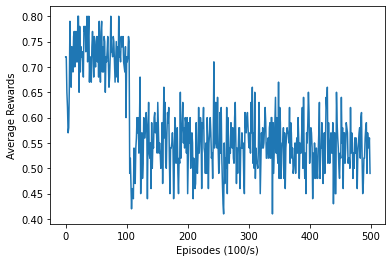

In [32]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_avg(values):
    return sum(values)/len(values)
avg_rewards = []

for i in range(0, len(rewards), 100):
    avg_rewards.append(get_avg(rewards[i:i+100]))
    
plt.plot(avg_rewards)
plt.ylabel('Average Rewards')
plt.xlabel('Episodes (100/s)')
plt.show()

# Conclusion
We used OpenAI GYM FrozenLake environment to trian our agent to learn from it's experience. We used Q-Learning algorithm for this problem.